<h1> Titanic: Machine Learning from Disaster </h1>

<p>
Author: Christian Camilo Urcuqui López
    <br>
Date:  28 November 2018
</p>

<b> Menu </b>
+ [Data dictionary](#Data-dictionary)
+ [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    + [Do the families sink or swim together?](#Do-the-families-sink-or-swim-together?)
    + [Working with missing values](#Working-with-missing-values)
    + [Predictive imputation](#Predictive-imputation)


## Data dictionary

The dictionary was taken from the next URL: https://www.kaggle.com/c/titanic/data

The discription of the data has:

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

<hr>
<b> Variable Notes </b>

<b>pclass:</b> A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

<b>age:</b> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

<b>sibsp:</b> The dataset defines family relations in this way...
<br>
<b>Sibling</b> = brother, sister, stepbrother, stepsister
<br>
<b>Spouse</b> = husband, wife (mistresses and fiancés were ignored)

<b>parch:</b> The dataset defines family relations in this way...
<br>
<b>Parent</b> = mother, father
<br>
<b>Child</b> = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



In [2]:
# import the packages
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np

In [69]:
# load the data
data = pd.read_csv("../../Datasets/train_titanic.csv")
# let's print a short view of the data 
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Exploratory Data Analysis

Let's see if the datasets has NaN values and its shape. 

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see that the Cabin and Embarked have the most lower number of registers, let's see the features types.

In [14]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Recall that the dependent variable to predict is the feature _Survided_, so we are working in a classification problem, specifically, in a supervised learning approach. 

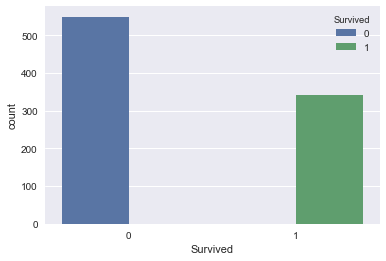

In [155]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Survived", data= data, hue="Survived")


We are working with a disbalanced dataset, we must apply a tranining and evaluation process like _cross validation_

I'm going to analyze the title of each person

In [70]:
import re
lista = []
for i in data.Name:      
    result = re.search("M(rs|r|s|iss|aster|me|lle)|Rev|Major|Capt|the Countess|Jonkheer|Sir|Lady", i)    
    if result is None:
        result = re.search("Dona", i) 
        if result is None:
            result = re.search("Don", i) 
            if result is None:
                result = re.search("Col", i) 
                if result is None:
                    result = re.search("Dr", i) 
    lista.append(result[0])    
title = np.array(lista)
print(len(title))

891


Let's apply a cross-tabulation of Sex and title, this process allows us to know their frequency and know what are rare registers

In [71]:
pd.crosstab(data.Sex, title, rownames=['sex'], colnames=['title'])

title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,515,0,0,6,3,0


In [72]:
rare_title = ['Lady', 'the Countess','Capt', 'Col', 'Don','Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

Next, through the last words, we can change them with their "equivalent" words

In [73]:
print(title[2])

Miss


In [74]:
for i in range(len(title)):
    if title[i] == 'Mlle':
        title[i] = 'Miss'
    if title[i] == 'Ms':
        title[i]  = 'Miss'
    if title[i] == 'Mme':
        title[i]  = 'Mrs'
    if title[i] in rare_title:
        title[i] = 'Rare Title'

In [75]:
pd.crosstab(data.Sex, title, rownames=['sex'], colnames=['title'])

title,Master,Miss,Mr,Mrs,Rare Title
sex,,,,,
female,0,185,0,126,3
male,40,0,515,0,22


In [117]:
serie = pd.Series(title)
data = data.assign(Tittle=serie).copy()

In [76]:
surname_list = []
for i in range(len(data)):
    surname_list.append((data['Name'][i]).split(",")[0])
serie  = pd.Series(surname_list)    

In [77]:
data = data.assign(surname=serie).copy()

In [118]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Fsize,FsizeD,Deck,Tittle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2,small,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,2,small,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,singleton,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2,small,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,1,singleton,NaN,Mr


The idea behind surname is to analyze in a future the ethnicity 

## Do the families sink or swim together?

We are going to make a _family size_ variable based on number of siblings/spouse(s) and number of children/parents

In [79]:
family_size = []
for i in range(len(data)):
    family_size.append(data['SibSp'][i] + data['Parch'][i] + 1)   
serie = pd.Series(family_size)
data = data.assign(Fsize=serie).copy()

In [135]:
# we are going to make a new variable that has the surname and the size of the family
family_list = []
for i in range(len(data)):    
    family_list.append("_".join((data['surname'][i], str(data['Fsize'][i]))))   
serie = pd.Series(family_size)
data = data.assign(Family=serie).copy()

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
surname        891 non-null object
Fsize          891 non-null int64
FsizeD         876 non-null object
Deck           204 non-null object
Tittle         891 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(7), object(9)
memory usage: 125.4+ KB


[Text(0.5,0,'Family size')]

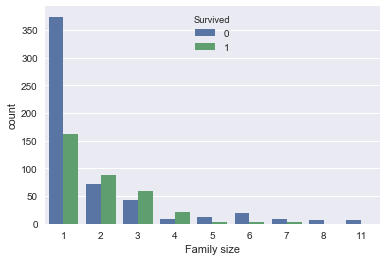

In [81]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Fsize", data= data, hue="Survived")
ax.set(xlabel="Family size")

As we can see at the last plot which allows us to understand that there is a survival penalty to singletons, let's discretized the family size 

In [82]:
data2 =  data.copy()

In [83]:
# Discretize family size
size_d = []
for i in range(len(data2)):
    if(data['Fsize'][i] == 1):
        size_d.append("singleton")
    if(data['Fsize'][i] < 5 and data['Fsize'][i] > 1):        
        size_d.append("small")
    if(data['Fsize'][i] > 5):
        size_d.append("large")
serie = pd.Series(size_d)
data = data.assign(FsizeD=serie).copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Fsize,FsizeD
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,2,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,singleton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,1,singleton


(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('small', '0'),
               (0.0, 0.0, 0.33003300330033003, 0.5973239885313794)),
              (('small', '1'),
               (0.0,
                0.6006462476675919,
                0.33003300330033003,
                0.399353752332408)),
              (('singleton', '0'),
               (0.334983498349835,
                0.0,
                0.6069442560694427,
                0.619907570667607)),
              (('singleton', '1'),
               (0.334983498349835,
                0.6232298298038196,
                0.6069442560694427,
                0.3767701701961803)),
              (('large', '0'),
               (0.9468782494687825,
                0.0,
                0.05312175053121746,
                0.6149713720223369)),
              (('large', '1'),
               (0.9468782494687825,
                0.6182936311585494,
                0.05312175053121746,
                0.3817063688414504))]))

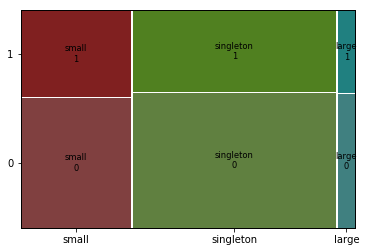

In [22]:
from statsmodels.graphics.mosaicplot import mosaic
# Show family size by survival using a mosaic plot
mosaic(data, ['FsizeD', 'Survived'])

The mosaic plot shows that there's a survival penalty among singletons and large families, but a benefit for passangers for passangers in small families.

## Working with missing values

As we can remember the features:

+ _Cabin_ has only 204 non-null register
+ _Age_ has 714 non-null registers
+ _Embarked_ has 889 non-null registers

what do we do with these?

#### Cabin

This feature has a lot of missing values, we are going to make something but we have to apply another process later.

In [84]:
# let's print the first 25 registers and see any pattern
data['Cabin'][:25]

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     D56
22     NaN
23      A6
24     NaN
Name: Cabin, dtype: object

For this example we are working only with the deck A - F

In [85]:
data['Cabin'][3][0]

'C'

In [86]:
deck_list = []
for i in range(len(data)):
    try:
        deck_list.append(data['Cabin'][i][0])
    except:
        deck_list.append(float('nan'))  
serie  = pd.Series(deck_list)
data = data.assign(Deck=serie).copy()

#### Embarked

What are the rows which have NaN?

In [87]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Fsize,FsizeD,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,1,large,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,1,singleton,B


We are going to select and separate them from the data in order to get ideas about what is going to be their treatment

In [89]:
data2 = data[data.Embarked.notna()].copy()
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Fsize,FsizeD,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2,small,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,2,small,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,singleton,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2,small,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,1,singleton,NaN


Is embarked feature related with passenger class and passenger fare features?

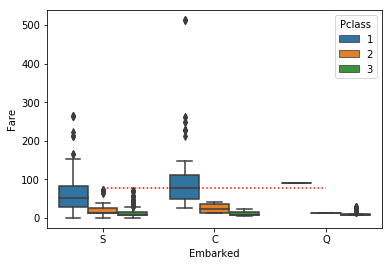

In [28]:
sns.boxplot(data=data2, x="Embarked", y="Fare", hue="Pclass")
plot.plot(data2.Embarked, np.full((889,1), 78.2667), ':r')

In [90]:
# this is the median of fare and for embarked type C
data2[(data2.Embarked == "C") & (data2.Pclass == 1)][:]["Fare"].median()

78.2667

The last anlysis allows us to understand that the median fare for a first class departing from Charbourg('C') coincides nicely with the $78 paid by our embarkment-deficient passengers.

In [105]:
data.iloc[[61,829],[11]] = 'C'

### Fare

Let's see that we have one NaN register in the _fare_ feature from our test dataset

In [109]:
data_test = pd.read_csv("../../Datasets/test_titanic.csv")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [110]:
data_test[data_test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


As we can see the this NaN has the Embarked information, what is happening with this class and the Fare?

The median is :8.05


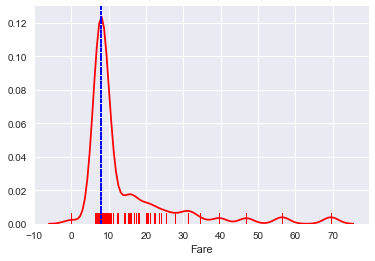

In [111]:
sns.distplot(data[(data.Embarked == "S") & (data.Pclass == 3)].Fare, hist= False, color = 'red', rug=True)
plot.plot(np.full((353,1), data[(data.Embarked == "S") & (data.Pclass == 3)].Fare.median()), data[(data.Embarked == "S") & (data.Pclass == 3)].Fare, ':b')
print("The median is :" + str(data[(data.Embarked == "S") & (data.Pclass == 3)].Fare.median()))

It is quite reasonable to replace the NA Fare value with median for their class and embarkment which is 78

In [114]:
data_test.iloc[152, 8] = data[(data.Embarked == "S") & (data.Pclass == 3)].Fare.median()

## Predictive imputation

### Age

Let's recall that there are quite a few missing _Age_ values in our dataset. One technique in imputing missing values is to apply a prediction algorithm which uses other variables from our data.

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
surname        891 non-null object
Fsize          891 non-null int64
FsizeD         876 non-null object
Deck           204 non-null object
Tittle         891 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(7), object(9)
memory usage: 125.4+ KB


In [331]:
data_2 = data[data.Age.notna()].copy()
data_2 = data_2[['PassengerId','Age', 'Sex', 'Embarked', 'surname', 'Family','Survived']].copy()
data_2_age = data_2[['Age']].copy()
data_2 = data_2.drop('Age', axis=1)
df1 = pd.get_dummies(data_2, columns=['Sex', 'Embarked', 'surname', 'Family'], dummy_na=False)
data_2_age.Age = data_2_age.Age.astype(int)
print(df1.shape)
print(data_2_age.shape)

(714, 550)
(714, 1)


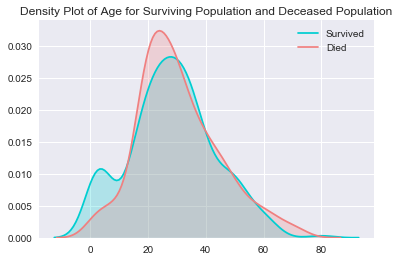

In [295]:
sns.kdeplot(data[data.Age.notna()].copy()["Age"][data[data.Age.notna()].copy().Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(data[data.Age.notna()].copy()["Age"][data[data.Age.notna()].copy().Survived == 0], color="lightcoral", shade=True)
plot.legend(['Survived', 'Died'])
plot.title('Density Plot of Age for Surviving Population and Deceased Population')
plot.show()

In [332]:
# we are going to use pclass, Sex, Embarked, Title, surname, family and FsizeD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

np.random.seed(128)
X_train, X_test, y_train, y_test = train_test_split(df1, data_2_age.Age, test_size=0.20)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

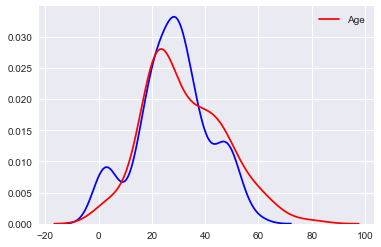

In [361]:
result = clf.predict(X_test)
fig, ax = plot.subplots()
sns.kdeplot(result, ax=ax, color='b')
sns.kdeplot(y_test, ax=ax, color='r')

In [363]:
# let's predict the nan values from Age
data[data.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,Fsize,FsizeD,Deck,Tittle,Family
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,1,singleton,NaN,Mr,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Williams,1,small,NaN,Mr,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Masselmani,1,singleton,NaN,Mrs,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Emir,1,singleton,NaN,Mr,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,O'Dwyer,1,singleton,NaN,Miss,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Todoroff,1,small,NaN,Mr,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Spencer,2,singleton,B,Mrs,2
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Glynn,1,small,NaN,Miss,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mamee,1,small,NaN,Mr,1
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Kraeff,1,singleton,NaN,Mr,1


In [255]:
if 0 in data.Age:
    print(True)

True


[Text(0.5,0,'Ticket class')]

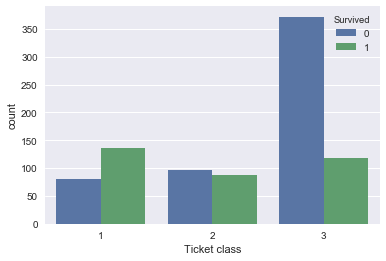

In [40]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Pclass", data= data, hue="Survived")
ax.set(xlabel="Ticket class")

In [290]:
data.to_csv("titanic_train.csv", sep=',')
data_test.to_csv("titanic_test.csv", sep=',')

In [4]:
data = pd.read_csv("titanic_inp.csv")
data_test = pd.read_csv("")

In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0     891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


## References

https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic